In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_examples(num=1000):
    W = [1.0, -3.0]
    b = 1.0
    
    W = np.reshape(W, (2, 1))
    
    X = np.random.randn(num, 2)
    y = b + np.dot(X, W) + np.random.randn()
    
    y = np.reshape(y, (num, 1))
    
    return X, y

In [3]:
X, y = generate_examples()

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [5]:
print('X=', X[0], ' & y=', y[0])

X= [-1.3338573   0.62299596]  & y= [-1.95437046]


In [6]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [7]:
model = Model(2)
print('W=', model.W)
print('b=', model.b)

W= [[-0.39336408]
 [ 1.15709635]]
b= 2.0958612029573978


In [8]:
class Model(Model):
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

In [9]:
preds = Model(2).forward_pass(np.random.randn(4, 2))
print(preds.shape)

(4, 1)


In [10]:
class Model(Model):
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

In [11]:
model = Model(2)

preds = model.forward_pass(X)
loss = model.compute_loss(y, preds)

In [12]:
loss

8.501954958562838

In [13]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

In [14]:
model = Model(2)
X, y = generate_examples()
y_hat = np.zeros(y.shape)

dW, db = model.backward_pass(X, y, y_hat)

In [15]:
print(dW.shape, db.shape)

(2,) ()


In [16]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

In [17]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % 100 == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [18]:
model = Model(2)

In [19]:
X_train, y_train = generate_examples()

In [20]:
losses = model.train(X_train, y_train, 1000, 3e-3)

Iter: 0, Current loss: 7.1884
Iter: 100, Current loss: 3.8363
Iter: 200, Current loss: 2.0479
Iter: 300, Current loss: 1.0935
Iter: 400, Current loss: 0.5840
Iter: 500, Current loss: 0.3120
Iter: 600, Current loss: 0.1667
Iter: 700, Current loss: 0.0891
Iter: 800, Current loss: 0.0476
Iter: 900, Current loss: 0.0255


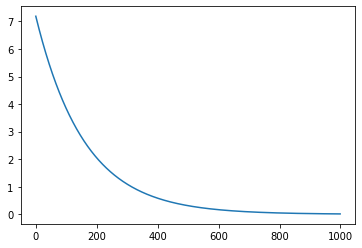

In [21]:
plt.plot(range(1000), losses);

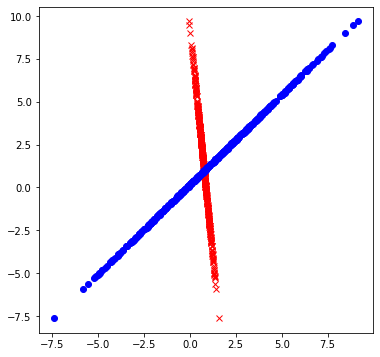

In [22]:
model_untrained = Model(2)

X_test, y_test = generate_examples(500)
y_test = np.reshape(y_test, (y_test.shape[0], 1))

preds_untrained = model_untrained.forward_pass(X_test)
preds_trained = model.forward_pass(X_test)

plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx')
plt.plot(preds_trained, y_test, 'bo')
plt.show()

In [23]:
model.W

array([[ 0.93509117],
       [-2.87243568]])

In [24]:
model.b

1.1170917078722231